# Module 16.5: Practice Day

## Custom Dataset Generator

In [2]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
    rng = np.random.default_rng(seed)
    hours_studied = rng.normal(5, 2, n).clip(1, 10)
    marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
    gender = rng.choice(['Male', 'Female'], n)
    subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
    study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
    attempts = rng.integers(1, 4, n)
    return pd.DataFrame({
        'hours_studied': hours_studied.round(2),
        'marks': marks.round(2),
        'gender': gender,
        'subject': subject,
        'study_method': study_method,
        'attempts': attempts
    })

def generate_daily_sales(n=60, seed=42):
    rng = np.random.default_rng(seed)
    base = pd.date_range(start='2024-01-01', periods=n, freq='D')
    trend = np.linspace(50, 80, n)
    season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
    noise = rng.normal(0, 3, n)
    sales = (trend + season + noise).round(2)
    return pd.DataFrame({'date': base, 'sales': sales})

# Example usage
students = generate_students(220)
sales = generate_daily_sales(90)

In [4]:
students.head(10)

hours_studied  marks  gender  subject study_method  attempts
0           5.61  54.04    Male  English         Solo         2
1           2.92  30.00  Female  Science         Solo         2
2           6.50  70.46  Female  History        Group         3
3           6.88  52.76  Female  English        Group         3
4           1.10  30.00  Female  History         Solo         1
5           2.40  30.00  Female  History         Solo         3
6           5.26  53.20    Male     Math         Solo         2
7           4.37  49.99    Male  Science         Solo         1
8           4.97  55.24    Male  English         Solo         3
9           3.29  34.28  Female  History         Solo         1

In [5]:
sales.head(10)

date  sales
0 2024-01-01  50.91
1 2024-01-02  48.06
2 2024-01-03  54.61
3 2024-01-04  56.33
4 2024-01-05  48.78
5 2024-01-06  51.82
6 2024-01-07  57.15
7 2024-01-08  56.81
8 2024-01-09  58.64
9 2024-01-10  57.00

## Problems

1. Using sales, draw a lineplot of date vs sales.
2. From students, plot hours_studied vs marks and color by gender.
3. Create a grid of scatterplots (hours_studied vs marks) faceted by subject.
4. Plot a histogram of marks with a KDE overlay.
5. Show the KDE curve for hours_studied.
6. Display the count of records per subject.
7. Draw a regression line for hours_studied and marks.
8. Create a pairplot and a jointplot for students' dataset.
9. Make a scatter plot of hours_studied vs marks using Plotly, colored by gender.
10. Draw a line chart of sales over date and a histogram of marks using Plotly.


In [43]:
import seaborn as sns
import plotly.express as px

### 1.Using sales, draw a lineplot of date vs sales.

<Axes: xlabel='date', ylabel='sales'>

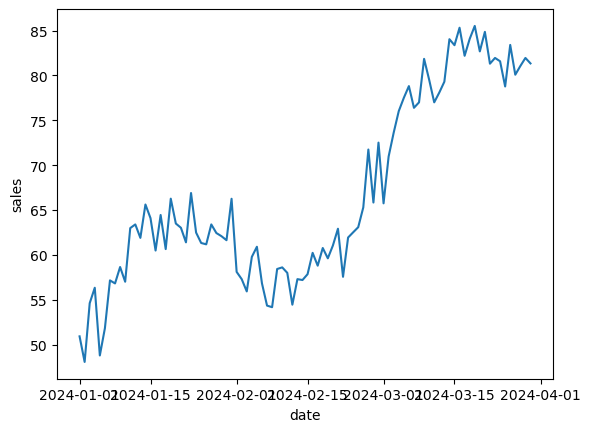

In [9]:
sns.lineplot(data=sales, x='date', y='sales')

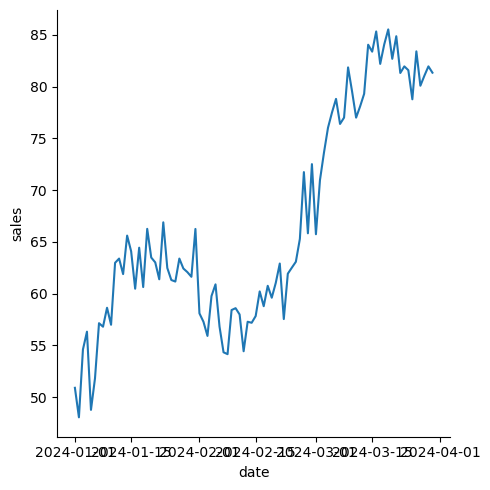

In [10]:
sns.relplot(kind='line', data=sales, x='date', y='sales')

### 2.From students, plot hours_studied vs marks and color by gender.

<Axes: xlabel='hours_studied', ylabel='marks'>

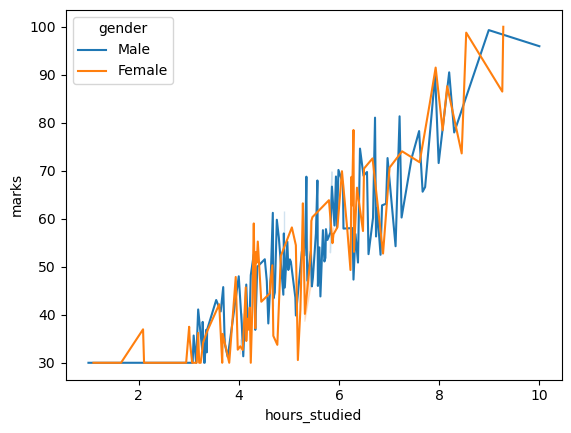

In [12]:
sns.lineplot(data=students, x='hours_studied', y='marks', hue='gender')

### 3. Create a grid of scatterplots (hours_studied vs marks) faceted by subject.

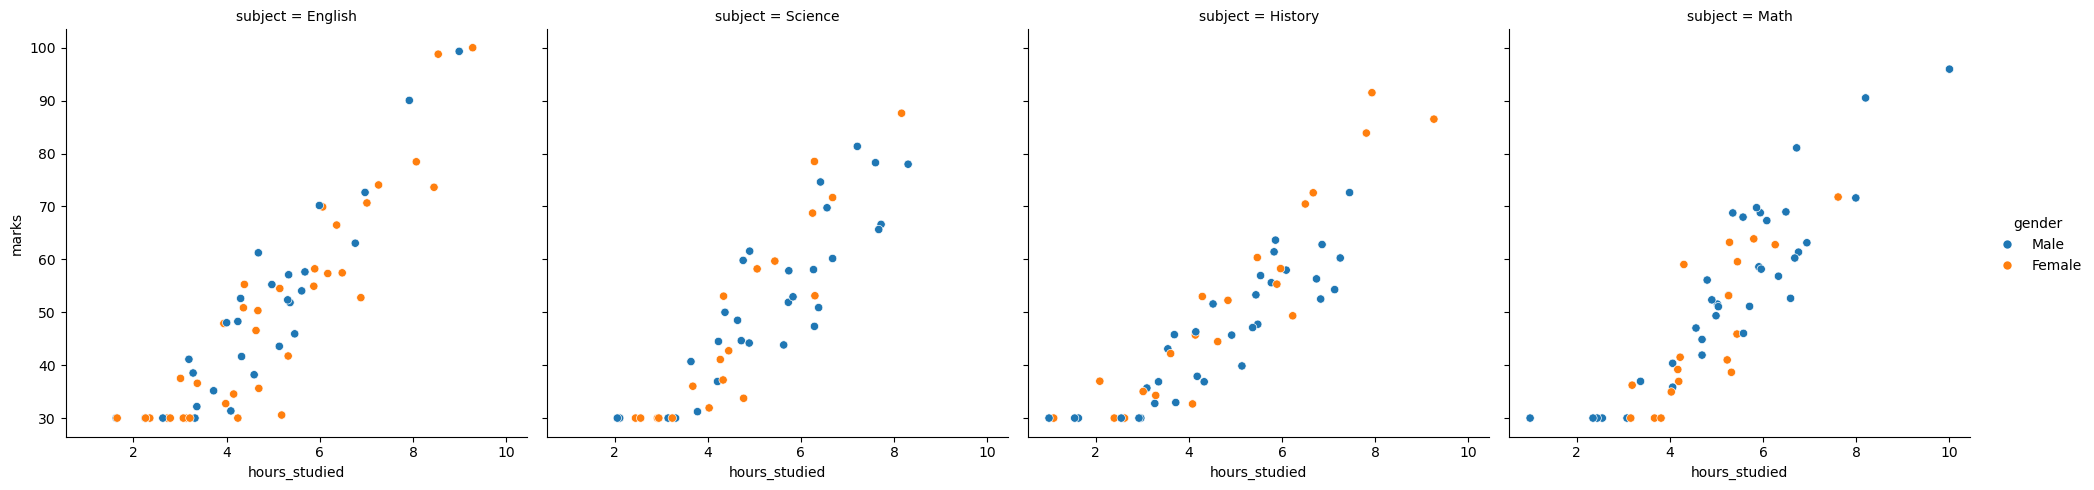

In [18]:
sns.relplot(kind='scatter', data=students, x='hours_studied', y='marks', hue='gender', col='subject')

### 4. Plot a histogram of marks with a KDE overlay.

<Axes: xlabel='marks', ylabel='Count'>

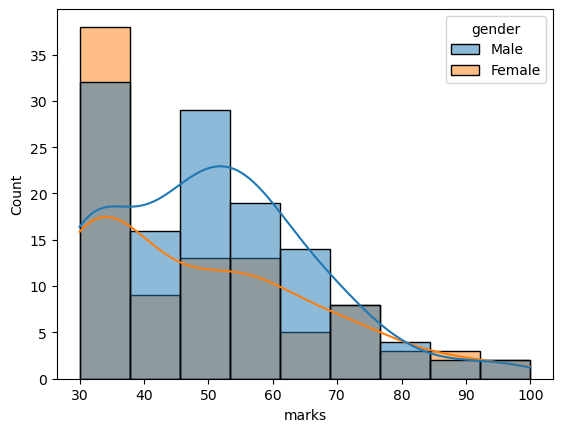

In [20]:
sns.histplot(data=students, x='marks', kde=True, hue='gender')

### 5. Show the KDE curve for hours_studied.

<Axes: xlabel='hours_studied', ylabel='Density'>

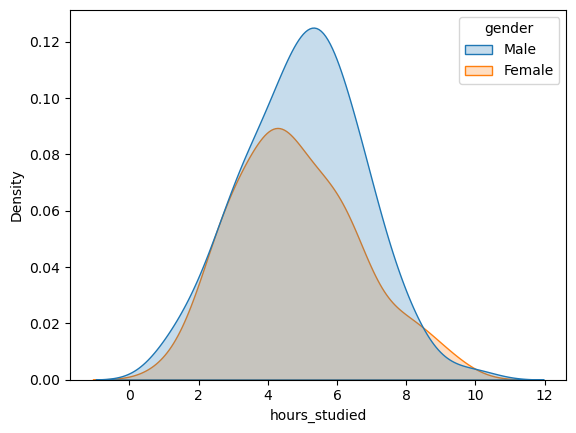

In [22]:
sns.kdeplot(data=students, x='hours_studied', hue='gender', fill=True)

### 6. Display the count of records per subject.

<Axes: xlabel='subject', ylabel='count'>

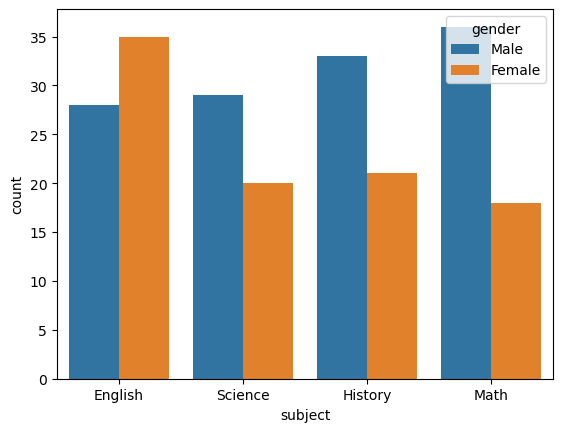

In [25]:
sns.countplot(data=students, x='subject', hue='gender')

### 7. Draw a regression line for hours_studied and marks.

<Axes: xlabel='hours_studied', ylabel='marks'>

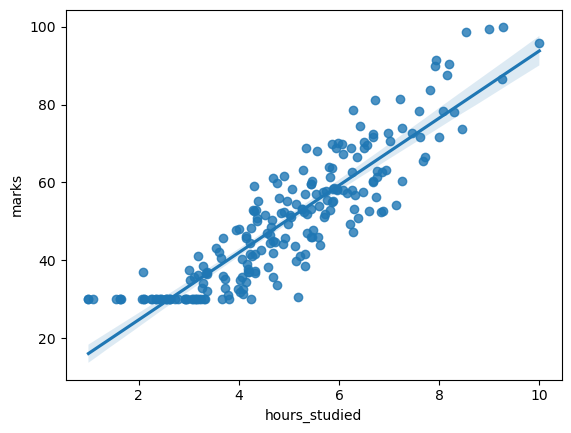

In [29]:
sns.regplot(data=students, x='hours_studied', y='marks')

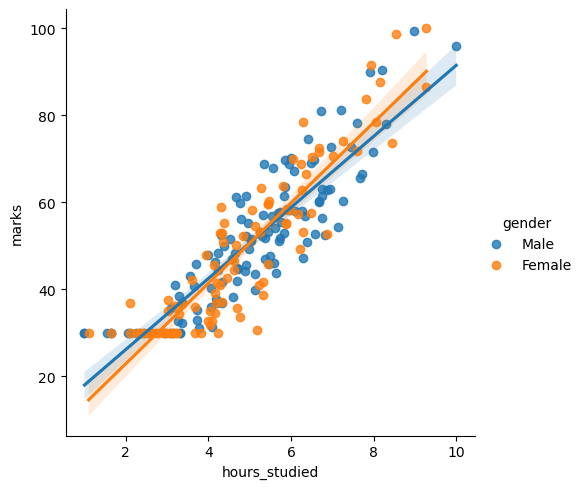

In [30]:
sns.lmplot(data=students, x='hours_studied', y='marks', hue='gender')

### 8. Create a pairplot and a jointplot for students' dataset.

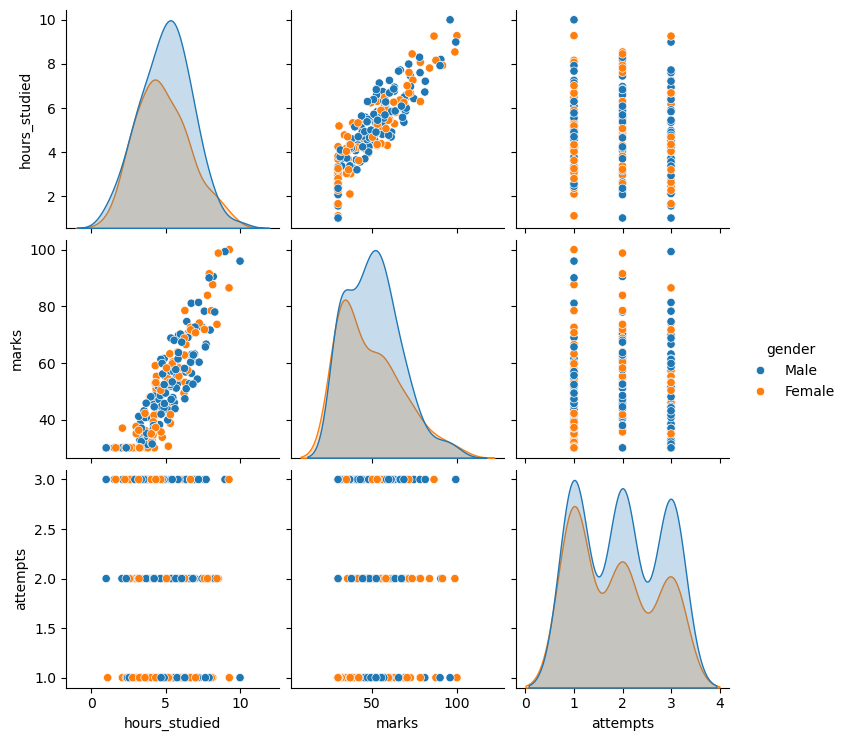

In [31]:
sns.pairplot(data=students, kind='scatter', hue='gender')

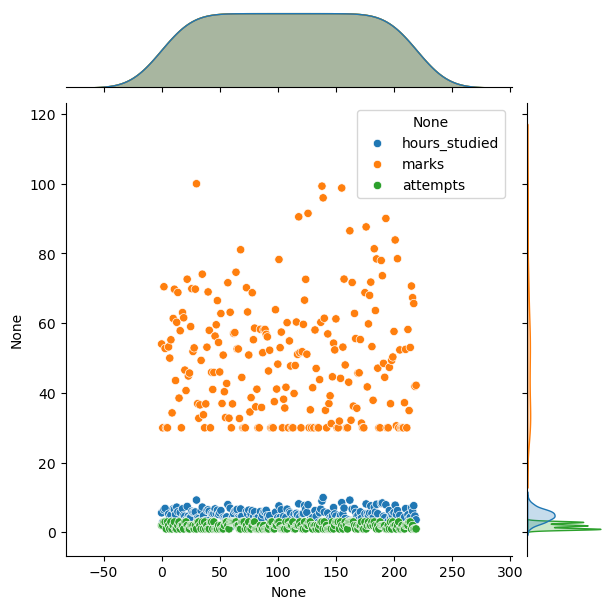

In [35]:
sns.jointplot(data=students, kind='scatter')

### 9. Make a scatter plot of hours_studied vs marks using Plotly, colored by gender.

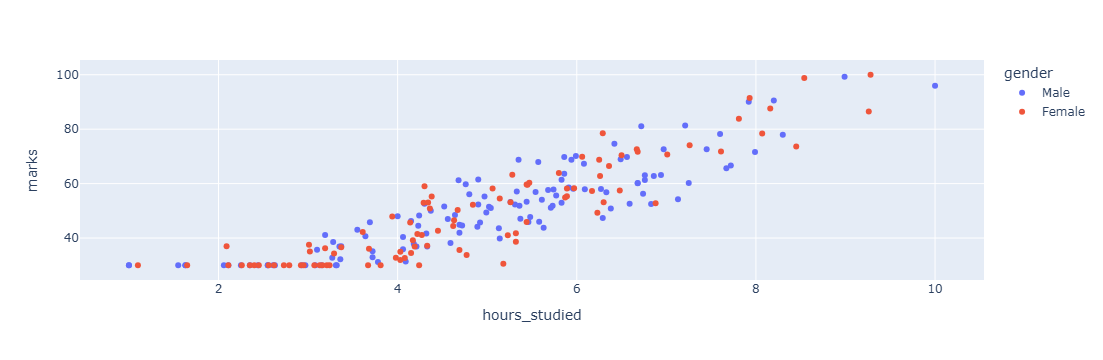

In [42]:
fig = px.scatter(students, x='hours_studied', y='marks', color='gender')
fig.show()

### 10. Draw a line chart of sales over date and a histogram of marks using Plotly.

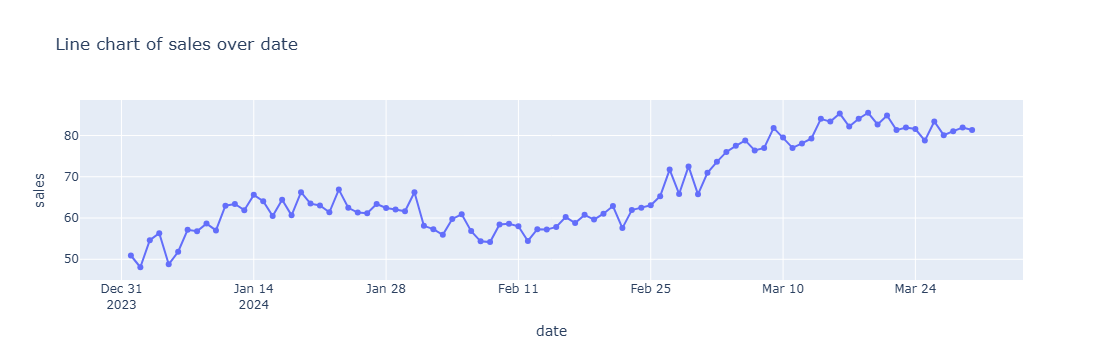

In [51]:
fig = px.line(sales, x='date', y='sales', title='Line chart of sales over date', markers=True)
fig.show()

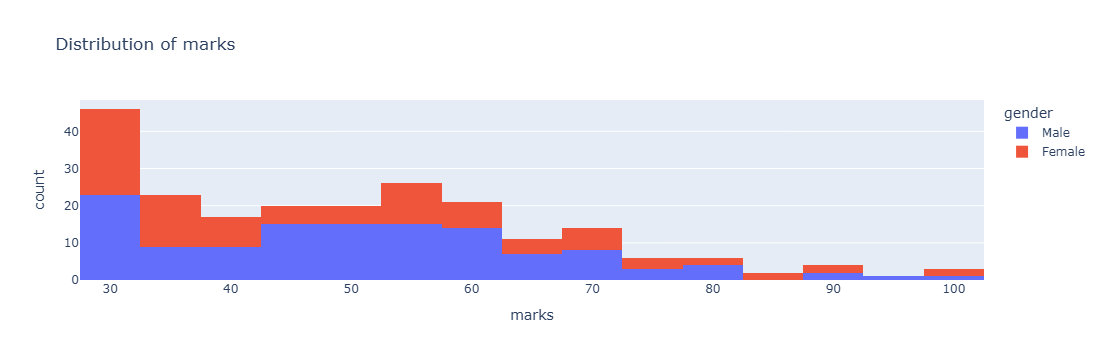

In [52]:
fig = px.histogram(students, x='marks', title='Distribution of marks', color='gender')
fig.show()